In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_parquet(r'C:\Users\91706\Data Analytics Practice\databases\python\crime data\Crime_Data_from_2020_to_Present.parquet')

- Top 10 Premises Where Crimes Occur

In [4]:
plto18=df.groupby('Premis Desc').size().sort_values(ascending=False).head(10).reset_index(name='count')
plto18

,Premis Desc,count
0,STREET,261284
1,SINGLE FAMILY DWELLING,163654
2,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",119011
3,PARKING LOT,69147
4,OTHER BUSINESS,47647
5,SIDEWALK,40861
6,"VEHICLE, PASSENGER/TRUCK",29302
7,GARAGE/CARPORT,19362
8,DRIVEWAY,16082
9,DEPARTMENT STORE,14433


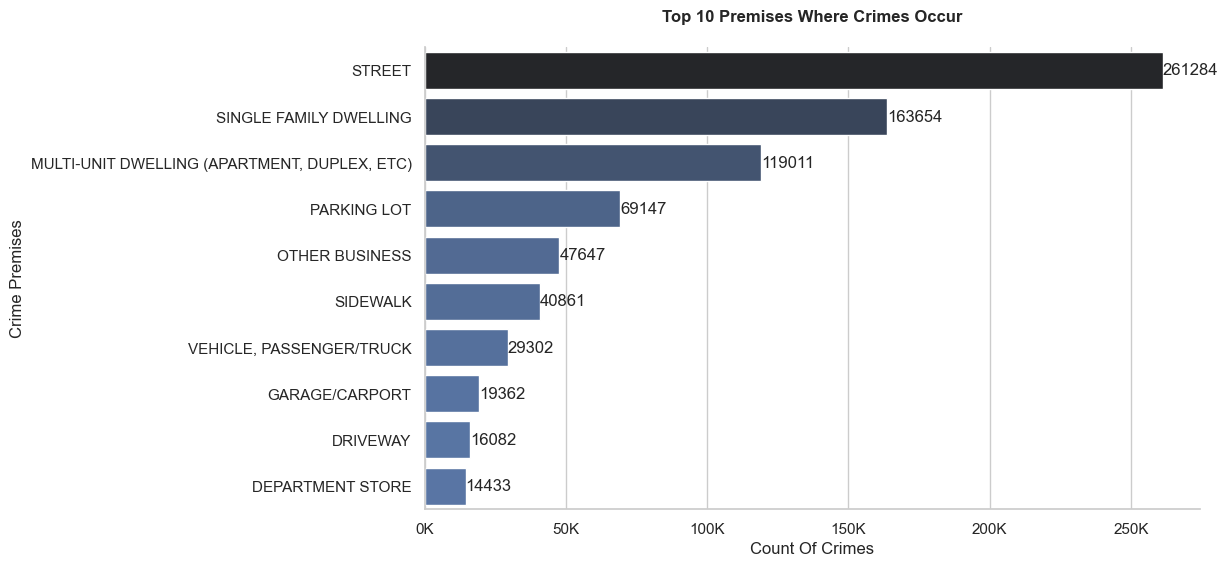

In [5]:
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')

ax=sns.barplot(data=plto18,x='count',y='Premis Desc',hue='count',palette='dark:b_r')
plt.xlabel('Count Of Crimes')
plt.ylabel('Crime Premises')
plt.title('Top 10 Premises Where Crimes Occur\n', weight='bold')
ax.legend_.remove()
for i in ax.containers:
    ax.bar_label(i)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
sns.despine()
plt.show()

- Premise-wise Crime Frequency by Year

In [6]:
plto19=df.groupby('occ_year')['Premis Desc'].value_counts().groupby(level=0).head(10).reset_index(name='count')
plto19

,occ_year,Premis Desc,count
0,2020,STREET,50456
1,2020,SINGLE FAMILY DWELLING,34182
2,2020,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",24339
3,2020,PARKING LOT,14457
4,2020,SIDEWALK,9319
5,2020,OTHER BUSINESS,9198
6,2020,"VEHICLE, PASSENGER/TRUCK",6768
7,2020,GARAGE/CARPORT,4188
8,2020,DRIVEWAY,4008
9,2020,RESTAURANT/FAST FOOD,2493


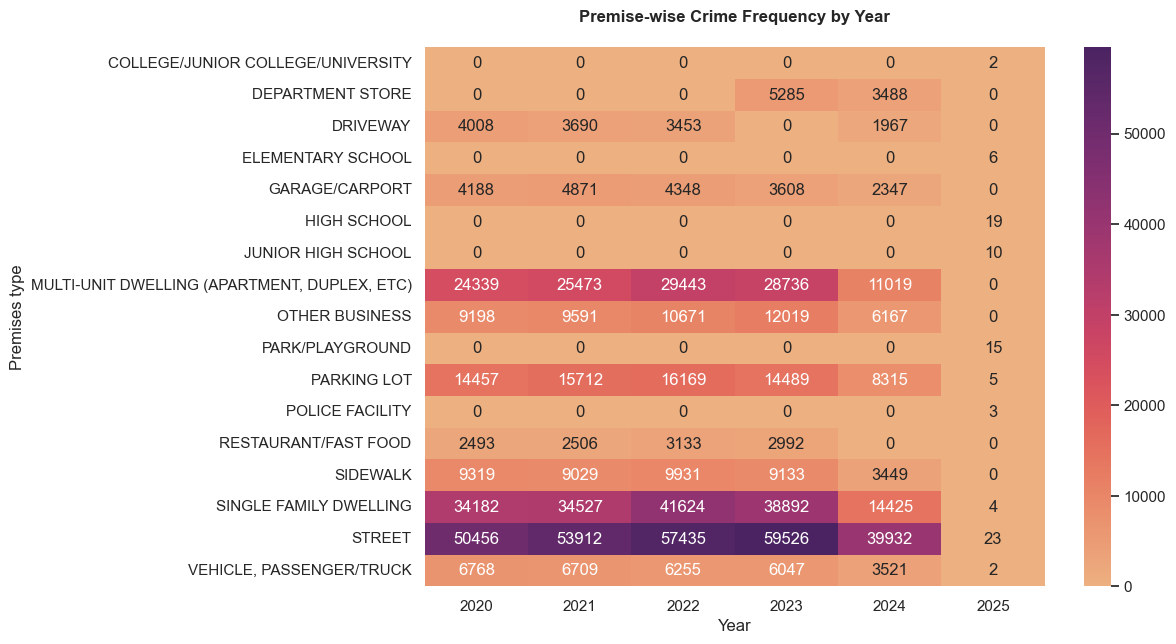

In [7]:
plt.figure(figsize=(10,7))
heatmap_data111=plto19.pivot_table(
    index='Premis Desc',
    columns='occ_year',
    values='count',
    fill_value=0
)

ax=sns.heatmap(data=heatmap_data111,cmap='flare',annot=True,fmt='.0f')
plt.xlabel('Year')
plt.ylabel('Premises type')
plt.title('Premise-wise Crime Frequency by Year\n',weight='bold')

plt.show()

- Area vs Premise Relationship

In [8]:
plto20=df.groupby('AREA NAME')['Premis Desc'].value_counts().groupby(level=0).head(7).reset_index(name='count')
plto20

,AREA NAME,Premis Desc,count
0,77th Street,STREET,21714
1,77th Street,SINGLE FAMILY DWELLING,16571
2,77th Street,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",4765
3,77th Street,SIDEWALK,2723
4,77th Street,PARKING LOT,2561
...,...,...,...
142,Wilshire,OTHER BUSINESS,5608
143,Wilshire,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",5083
144,Wilshire,PARKING LOT,2180
145,Wilshire,SIDEWALK,1670


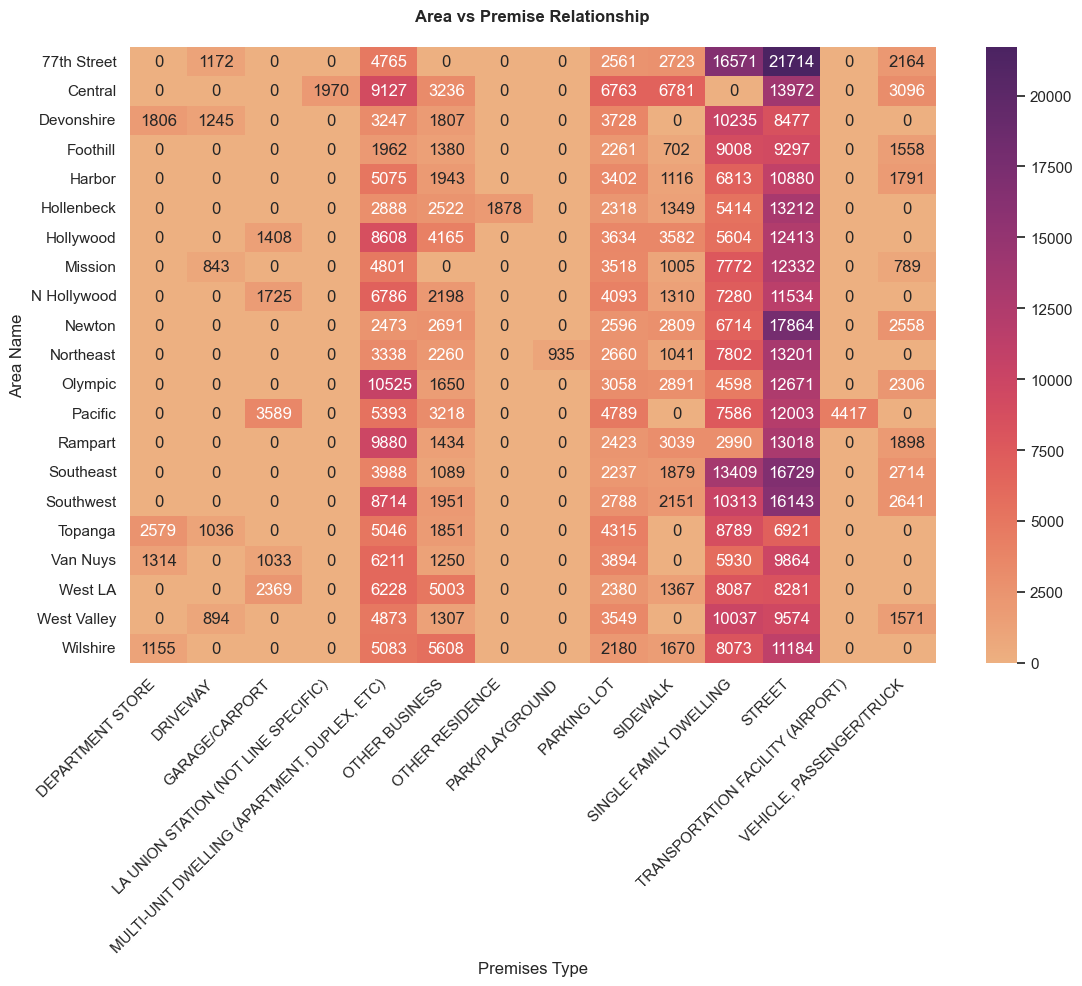

In [9]:
plt.figure(figsize=(13,8))
heatmap_data112=plto20.pivot_table(
    index='AREA NAME',
    columns='Premis Desc',
    values='count',
    fill_value=0
)

ax=sns.heatmap(data=heatmap_data112,cmap='flare',annot=True,fmt='.0f')
plt.xlabel('Premises Type')
plt.ylabel('Area Name')
plt.title('Area vs Premise Relationship\n', weight='bold')

plt.setp(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()

- Filter Crimes Related to Vehicles

In [10]:
keyword=['CAR','VEHICLE','MOTOR']

df['car_involved']=df['Crm Cd Desc'].apply(
    lambda x: 'Yes' if any(word in str(x).upper() for word in keyword) else 'No'
)

In [11]:
plto21=df[df['car_involved'] == 'Yes']['Crm Cd Desc'].value_counts().head(10).reset_index(name='count')
plto21

,Crm Cd Desc,count
0,VEHICLE - STOLEN,115190
1,BURGLARY FROM VEHICLE,63517
2,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),41314
3,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,36941
4,VEHICLE - ATTEMPT STOLEN,3864
5,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",2935
6,THEFT FROM MOTOR VEHICLE - ATTEMPT,857
7,THROWING OBJECT AT MOVING VEHICLE,791
8,"BURGLARY FROM VEHICLE, ATTEMPTED",707
9,"SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT",475


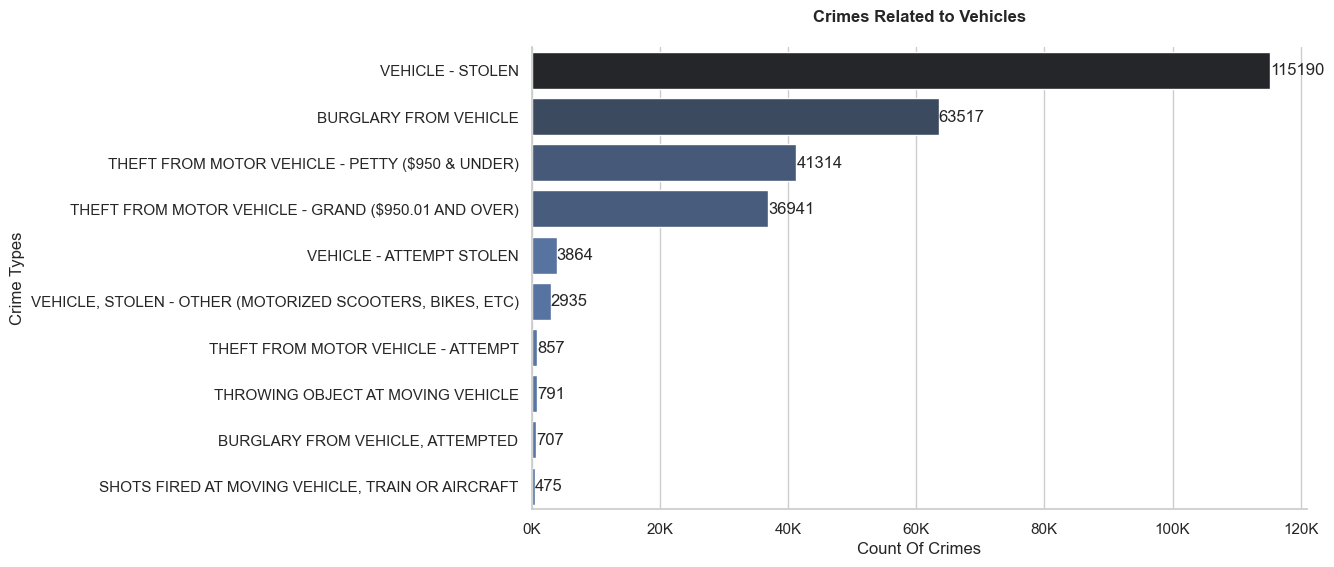

In [12]:
plt.figure(figsize=(10,6))

ax=sns.barplot(data=plto21,x='count',y='Crm Cd Desc',hue='count',palette='dark:b_r')
plt.xlabel('Count Of Crimes')
plt.ylabel('Crime Types')
plt.title('Crimes Related to Vehicles\n',weight='bold')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
for i in ax.containers:
    ax.bar_label(i)
ax.legend_.remove()
sns.despine()
plt.show()

- Monthly Trend of Vehicle Thefts or Break-ins

In [13]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['occ_month']=pd.Categorical(df['occ_month'],categories=month_order, ordered=True)
crimes = df[df['Crm Cd Desc'].isin(['VEHICLE - STOLEN','BURGLARY FROM VEHICLE, ATTEMPTED'])]
plto23=crimes.groupby(['occ_month','Crm Cd Desc']).size().reset_index(name='count')
plto23

C:\Users\91706\AppData\Local\Temp\ipykernel_15612\1990984325.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plto23=crimes.groupby(['occ_month','Crm Cd Desc']).size().reset_index(name='count')


,occ_month,Crm Cd Desc,count
0,Jan,"BURGLARY FROM VEHICLE, ATTEMPTED",70
1,Jan,VEHICLE - STOLEN,9477
2,Feb,"BURGLARY FROM VEHICLE, ATTEMPTED",77
3,Feb,VEHICLE - STOLEN,8690
4,Mar,"BURGLARY FROM VEHICLE, ATTEMPTED",53
5,Mar,VEHICLE - STOLEN,9360
6,Apr,"BURGLARY FROM VEHICLE, ATTEMPTED",52
7,Apr,VEHICLE - STOLEN,9473
8,May,"BURGLARY FROM VEHICLE, ATTEMPTED",56
9,May,VEHICLE - STOLEN,9755


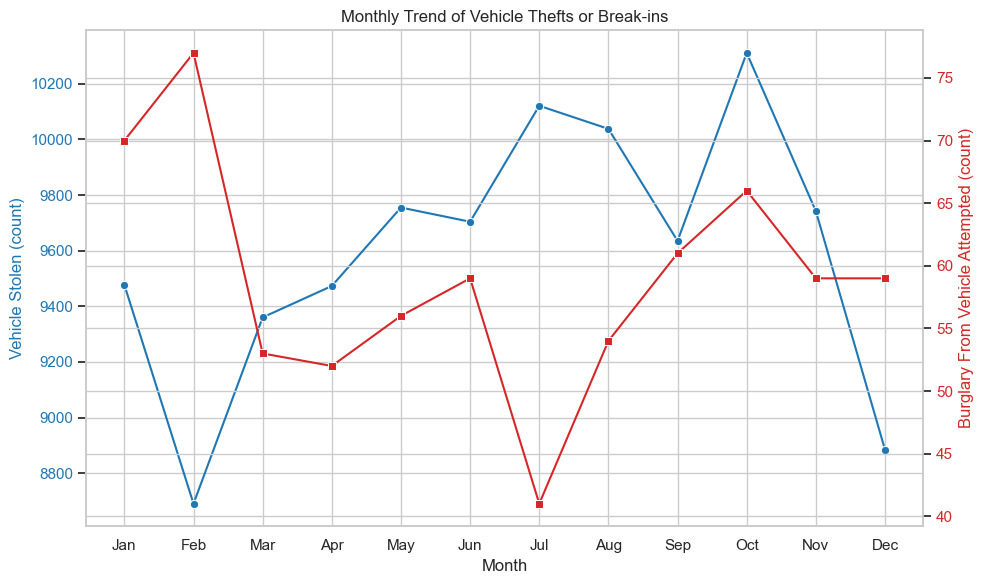

In [14]:
stolen = plto23[plto23['Crm Cd Desc'] == 'VEHICLE - STOLEN']
burglary = plto23[plto23['Crm Cd Desc'] == 'BURGLARY FROM VEHICLE, ATTEMPTED']

sns.set_theme(style='whitegrid')
fig,ax1=plt.subplots(figsize=(10,6))

sns.lineplot(data=stolen,x='occ_month',y='count',ax=ax1,color='tab:blue', marker='o', label='Vehicle Stolen')
ax1.tick_params(axis='y',labelcolor='tab:blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Vehicle Stolen (count)', color='tab:blue')
ax1.legend_.remove()

ax2=ax1.twinx()

sns.lineplot( data=burglary, x='occ_month', y='count', ax=ax2, color='tab:red', marker='s', label='Burglary Attempted')
ax2.tick_params(axis='y',labelcolor='tab:red')
ax2.set_ylabel('Burglary From Vehicle Attempted (count)', color='tab:red')
ax2.legend_.remove()

plt.title('Monthly Trend of Vehicle Thefts or Break-ins')
plt.tight_layout()
plt.show()

- Common Time and Areas for Vehicle Crimes

In [15]:
crime1=df[df['car_involved'] == 'Yes'].copy()
crime1['TIME OCC']=crime1['TIME OCC'].astype(str)
crime1['hour']=crime1['TIME OCC'].str.split(':').str[0].astype(float)

In [16]:
bins = [0, 6, 10, 14, 18, 22, 24]
labels = ['Late Night(0-6)', 'Morning Rush(6-10)', 'Midday(10-14)', 'Afternoon(14-18)', 'Evening Rush(18-22)', 'Late Evening(22-24)']

crime1['time_buck']=pd.cut(crime1['hour'], bins=bins, labels=labels, right=False, include_lowest=True)

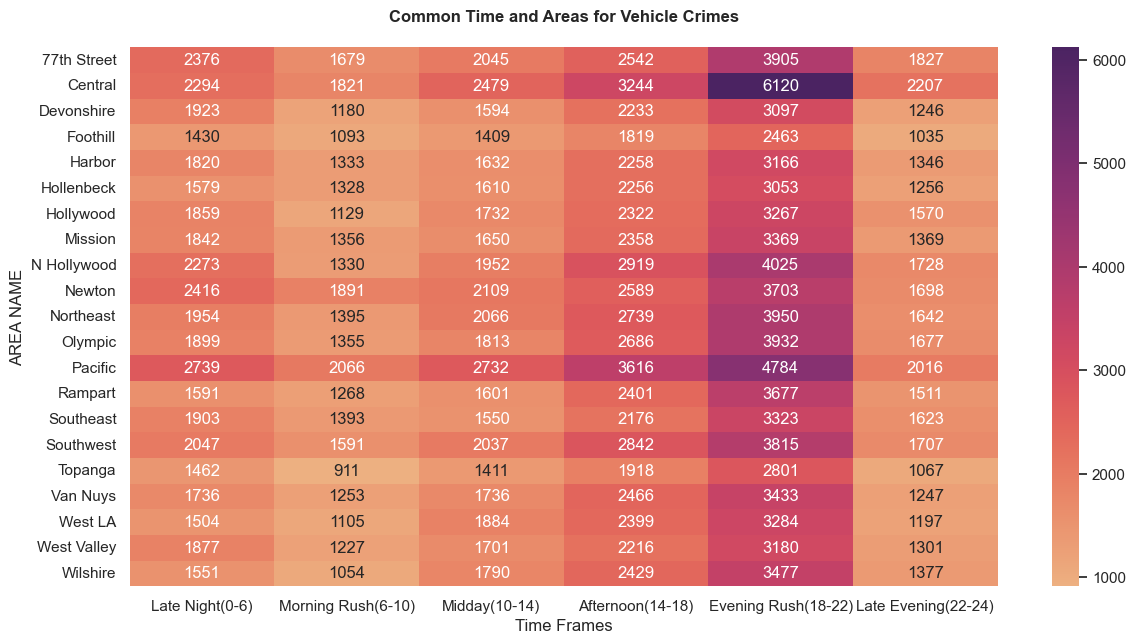

In [17]:
plot24=crime1.groupby('time_buck',observed=True)['AREA NAME'].value_counts().reset_index(name='count')

heatmap_data113=plot24.pivot_table(
    index='AREA NAME',observed=True,
    columns='time_buck',
    values='count',
    fill_value=0
)

plt.figure(figsize=(14,7))
ax=sns.heatmap(heatmap_data113,cmap='flare',annot=True,fmt='.0f')
plt.xlabel('Time Frames')
plt.title('Common Time and Areas for Vehicle Crimes\n',weight='bold')
plt.show()

- Weapon Involvement in Vehicle Crimes

In [18]:
plot25=crime1['Weapon Desc'].value_counts().head(10).reset_index(name='count')
plot25

,Weapon Desc,count
0,Unknown,261057
1,UNKNOWN WEAPON/OTHER WEAPON,4229
2,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",394
3,ROCK/THROWN OBJECT,267
4,VERBAL THREAT,247
5,HAND GUN,225
6,BOMB THREAT,170
7,UNKNOWN FIREARM,166
8,SEMI-AUTOMATIC PISTOL,82
9,UNKNOWN TYPE CUTTING INSTRUMENT,66


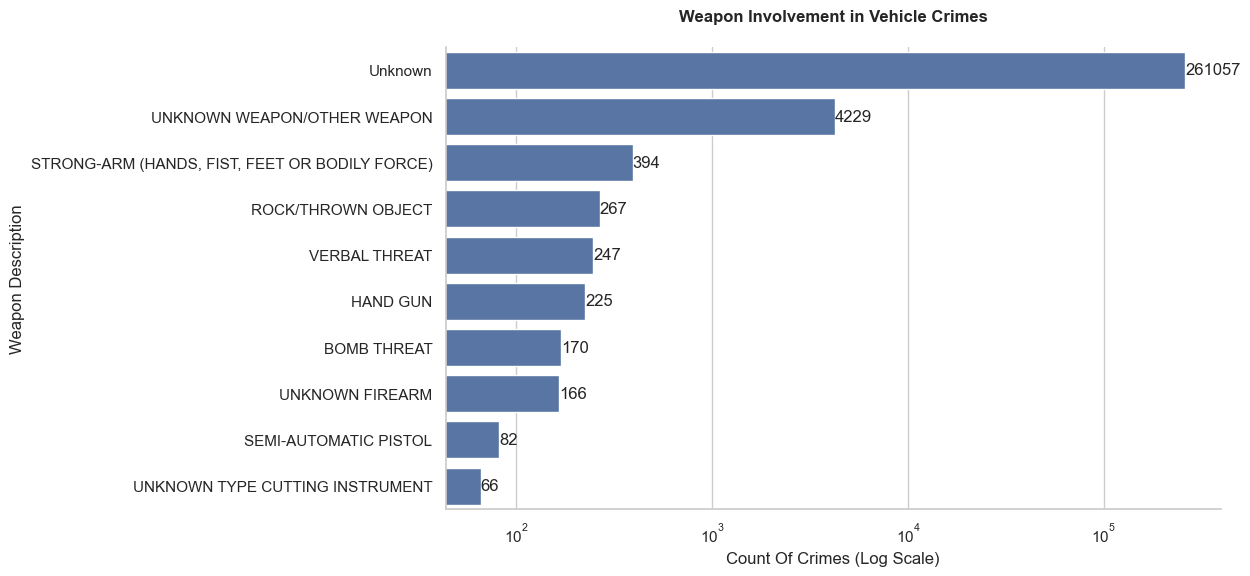

In [19]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=plot25,x='count',y='Weapon Desc')
plt.xscale('log')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Count Of Crimes (Log Scale)')
plt.ylabel('Weapon Description')
plt.title('Weapon Involvement in Vehicle Crimes\n',weight='bold')
sns.despine()
plt.show()

- Victim Profile in Vehicle-Related Crimes

In [21]:
plot26= crime1['Vict Sex'].value_counts().reset_index(name='count')
plot26

,Vict Sex,count
0,Unknown,145392
1,Male,71353
2,Female,50491
3,Transgender/Other,29


In [22]:
plot27=crime1['Vict Descent'].value_counts().reset_index(name='count')
plot27

,Vict Descent,count
0,Unknown,146003
1,White,41421
2,Hispanic/Latin/Mexican,41146
3,Black,15032
4,Other,12448
5,Other Asian,3758
6,Filipino,2025
7,Korean,1931
8,Chinese,1623
9,Japanese,686


In [23]:
bins=0,12,18,30,45,60,float('inf')
labels=['kids (0-11)','tennager (12-17)','young (18-29)','adult (30-44)','mid-age (44-59)','old (>60)']
crime1['age-group']=pd.cut(crime1['Vict Age'],bins=bins,labels=labels,right=False,include_lowest=True)

In [24]:
plot28=crime1.groupby('age-group',observed=True).size().reset_index(name='count')
plot28

,age-group,count
0,kids (0-11),146847
1,tennager (12-17),125
2,young (18-29),32141
3,adult (30-44),47495
4,mid-age (44-59),26507
5,old (>60),14147


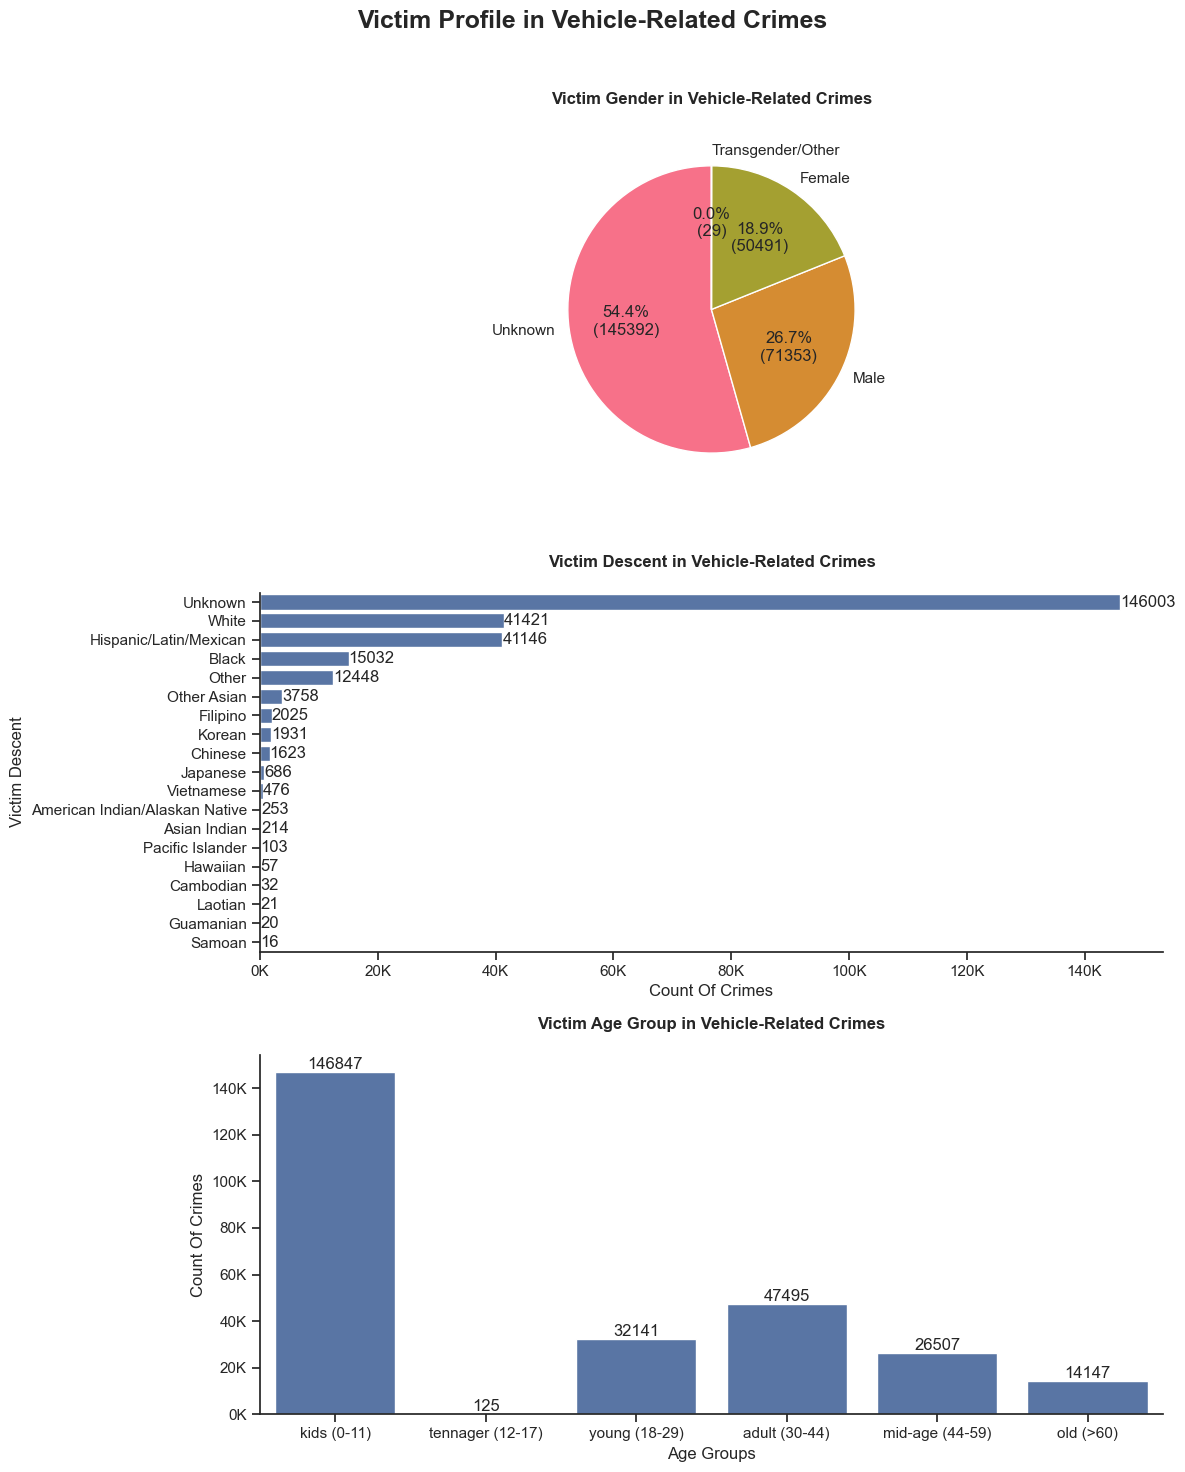

In [61]:
fig,ax=plt.subplots(3,1,figsize=(12,15))
sns.set_theme(style='ticks')
plt.suptitle('Victim Profile in Vehicle-Related Crimes\n\n',weight='bold',fontsize=18)

ax[0].pie(
    plot26['count'],
    labels=plot26['Vict Sex'],
    autopct=lambda p: f'{p:.1f}%\n({p*sum(plot26['count'])/100:.0f})',
    startangle=90,
    wedgeprops={'edgecolor': 'white'},
    colors=sns.color_palette("husl", 9)
)
ax[0].set_title('Victim Gender in Vehicle-Related Crimes\n',weight='bold')

sns.barplot(data=plot27,x='count',y='Vict Descent',ax=ax[1])
ax[1].set_title('Victim Descent in Vehicle-Related Crimes\n',weight='bold')
ax[1].set_xlabel('Count Of Crimes')
ax[1].set_ylabel('Victim Descent')
for i in ax[1].containers:
    ax[1].bar_label(i)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
sns.despine()

sns.barplot(data=plot28,x='age-group',y='count',ax=ax[2])
ax[2].set_title('Victim Age Group in Vehicle-Related Crimes\n',weight='bold')
ax[2].set_xlabel('Age Groups')
ax[2].set_ylabel('Count Of Crimes')
for i in ax[2].containers:
    ax[2].bar_label(i)
ax[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
sns.despine()
plt.tight_layout()